#  N-body6 to spicea working example

This is a notebook testing the implementation of SPISEA for using Nbody6 models as input.
SPISEA was designed to compute a synthetic population of stars from scratch. However, our implementation aims to provide the stars as input, from the N-body6 (gradual formation) simulations.

The structure of this implementation is as follows:
1) We have our own version of SPICEA where we must implement the general tools to provide a star cluster as input, being as general as possible. This means do not depend on Nbody6 data structure, but aim that an user should provide any arbirtrary table of stars.

2) In our project repository, i.e. this one, we construct the scripts that translate our simulations data format to the structure that SPISEA requires, based on the above implementation.


In [1]:
import os
import sys
sys.path.insert(0,os.path.abspath('../')) # This should not be necessary if you add this repo to your python path.
import numpy

from nbody62spisea import converter # This is the file that contains the data transition routines.

# This is my nbody6tools package for analysing the nbody simulations
#https://github.com/juanfariaso/nbody6tools
from nbody6tools import Reader 

#This should be our forked version of spicea from: https://github.com/juanfariaso/SPISEA
from spisea.synthetic import CustomResolvedCluster 

%load_ext autoreload
%autoreload 2

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [8]:
# Path to the simulation folder.
# All simulatinos are storaged in the origins machine in chalmers.
folder = '../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff003/15/'


In [9]:
# Reading a snapshot object. See the nbody6tools repo for details
snap = Reader.read_snapshot(folder,time=10)
snap.to_physical() # original units are on Nbody units, changing to physical units.

Now we use the `converter` script to translate the snapshot object to a table that can be used by spisea.
 Single objects have `isMultiple`=0.
 
Note that these binaries are only the ones regularized by Nbody6. This does not necessairly means all binaries are included since that depends on several factors such as the local environment of a binary. Probably a more sophisticated binary selection is needed based on distance and semimajor axis.

In [10]:
cluster_table = converter.to_spicea_table(snap)
cluster_table

mass,isMultiple,compMass,systemMass,e,log_a,age
float64,float64,object,float64,float64,float64,float64
0.02251862994833492,0.0,[],0.02251862994833492,nan,nan,9.38147693658659
9.114911288321816,0.0,[],9.114911288321816,nan,nan,7.640108830592759
...,...,...,...,...,...,...
0.06478697706318487,1.0,[0.03154227387807578],0.09632925094126066,7.659271498087044e-05,2.1524570327658905,5.15037182644974
0.11695394902039674,1.0,[0.11695394902039674],0.23390789804079348,0.23317011358282647,4.22686524915783,3.7065836494386817


The following follows the example script used in SPISEA, but adapted to our implementation:

Note that for this example, we assume that all stars have the same age, which is not true. But this is only to test the implementation.

In [11]:
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
# Define isochrone parameters
logAge = numpy.log10(5*10**6.) # Age in log(years)
AKs = 0.8 # extinction in mags
dist = 4000 # distance in parsec
metallicity = 0 # Metallicity in [M/H]

# Define evolution/atmosphere models and extinction law
evo_model = evolution.Parsec() 
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Also specify filters for synthetic photometry (optional). Here we use 
# the HST WFC3-IR F127M, F139M, and F153M filters
filt_list = ['wfc3,ir,f127m', 'wfc3,ir,f139m', 'wfc3,ir,f153m']

# Specify the directory we want the output isochrone
# table saved in. If the directory does not already exist,
# SPISEA will create it.
iso_dir = 'isochrones/'

# Make IsochronePhot object. Note that this will take a minute or two, 
# unless the isochrone has been generated previously.
#
# Note that this is not show all of the user options 
# for IsochronePhot. See docs for complete list of options.
my_iso = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=0,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,recomp=True,
                                iso_dir=iso_dir)

Changing to logg=4.00 for T= 32449 logg=3.99
Changing to logg=4.00 for T= 32908 logg=3.95
Changing to logg=4.00 for T= 33037 logg=3.93
Changing to logg=4.00 for T= 33312 logg=3.89
Changing to logg=4.00 for T= 33435 logg=3.85
Changing to logg=4.00 for T= 33435 logg=3.81
Changing to logg=4.00 for T= 33435 logg=3.80
Changing to logg=4.00 for T= 33281 logg=3.76
Changing to logg=4.00 for T= 32984 logg=3.70
Changing to logg=4.00 for T= 32426 logg=3.63
Changing to logg=4.00 for T= 32174 logg=3.60
Changing to logg=4.00 for T= 31945 logg=3.57
Changing to logg=4.00 for T= 31089 logg=3.49
Changing to logg=3.50 for T= 30789 logg=3.46
Changing to logg=3.50 for T= 30493 logg=3.43
Changing to logg=3.50 for T= 29751 logg=3.37
Changing to logg=3.50 for T= 28953 logg=3.31
Changing to logg=3.50 for T= 28158 logg=3.24
Changing to logg=3.50 for T= 27315 logg=3.17
Changing to logg=3.50 for T= 26485 logg=3.10
Changing to logg=3.00 for T= 24712 logg=2.96
Changing to logg=3.00 for T= 23681 logg=2.87
Changing t

Starting synthetic photometry
M =   0.090 Msun  T =  2547 K  m_hst_f127m = 22.37
M =   2.128 Msun  T =  8024 K  m_hst_f127m = 16.17
M =  37.403 Msun  T = 15293 K  m_hst_f127m = 7.69
M =  42.307 Msun  T = 187629 K  m_hst_f127m = 16.64
Starting filter: wfc3,ir,f139m   Elapsed time: 10.60 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2547 K  m_hst_f139m = 22.31
M =   2.128 Msun  T =  8024 K  m_hst_f139m = 15.74
M =  37.403 Msun  T = 15293 K  m_hst_f139m = 7.32
M =  42.307 Msun  T = 187629 K  m_hst_f139m = 16.29
Starting filter: wfc3,ir,f153m   Elapsed time: 20.51 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2547 K  m_hst_f153m = 21.57
M =   2.128 Msun  T =  8024 K  m_hst_f153m = 15.33
M =  37.403 Msun  T = 15293 K  m_hst_f153m = 6.94
M =  42.307 Msun  T = 187629 K  m_hst_f153m = 15.94
      Time taken: 29.16 seconds


Note that the avobe script took about 12 seconds in my laptop to complete for one single age.

In order to implement the different ages, we may need to compute the above data for a grid of ages based on the age difference of the stars.

Now, we use our version of SPISEA to complement our previous basic table with synthetic photometry.

In [12]:
#cluster = CustomResolvedCluster(cluster_table[cluster_table['isMultiple'] ==1],my_iso)
cluster = CustomResolvedCluster(cluster_table,my_iso)
cluster.star_systems

Found 945 stars out of mass range
Found 181 companions out of stellar mass range


mass,isMultiple,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,m_hst_f127m,m_hst_f139m,m_hst_f153m,compMass,e,log_a,age,N_companions
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,int64
9.114911288321816,0.0,9.114911288321816,24185.64123555716,1.786095354473623e+30,4.217894933914584,0.0,9.114911288321816,1.0,0.0,13.996796088074158,13.630330659347214,13.272776750795309,[],nan,nan,7.640108830592759,0
0.16115785247259898,0.0,0.16115785247259898,2745.3605983702014,1.2156110137963761e+25,3.8499841991199983,0.0,0.16112329414856927,0.0,0.0,21.68305098993916,21.463134025666584,20.785516422853423,[],nan,nan,5.076617592159192,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.40091489108039674,1.0,0.612772623545214,3226.36713143301,4.4701457083555376e+25,3.960657566211182,0.0,0.40091483695520475,0.0,0.0,20.05982648257209,19.66365217084189,19.005688101663953,[0.21185773246481723],0.01203713882494691,3.1734279883281076,3.7574758731223366,1
0.11695394902039674,1.0,0.23390789804079348,2624.336639849455,8.054220753274694e+24,3.8109833335016603,0.0,0.11697535472990706,0.0,0.0,21.332806373997244,21.199270643650614,20.48795597739243,[0.11695394902039674],0.23317011358282647,4.22686524915783,3.7065836494386817,1


Plotting the resulting HR diagrame (single age, but with binaries)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


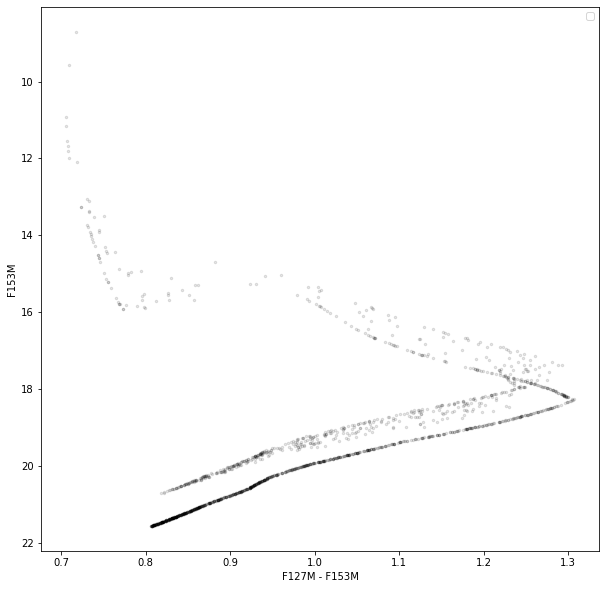

In [13]:
from matplotlib import pyplot as py
# Look at the cluster CMD, compared to input isochrone. Note the impact of
# multiple systems on the photometry
clust = cluster.star_systems
iso = my_iso.points

py.figure(2, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f127m'] - clust['m_hst_f153m'], clust['m_hst_f153m'],
       'k.', ms=5, alpha=0.1, label='__nolegend__')
py.xlabel('F127M - F153M')
py.ylabel('F153M')
py.gca().invert_yaxis()
py.legend()

# Multiple ages 

The above stars table already have implemented an age column for the stars that can be used in the implementation of muliple ages, here an histogram of them at 10 Myr. 

There is a peak at 10Myr since because of tecnical limitations of Nbody6, gradual formation simulations start with 150 stars at t = 0.

Text(0, 0.5, 'N')

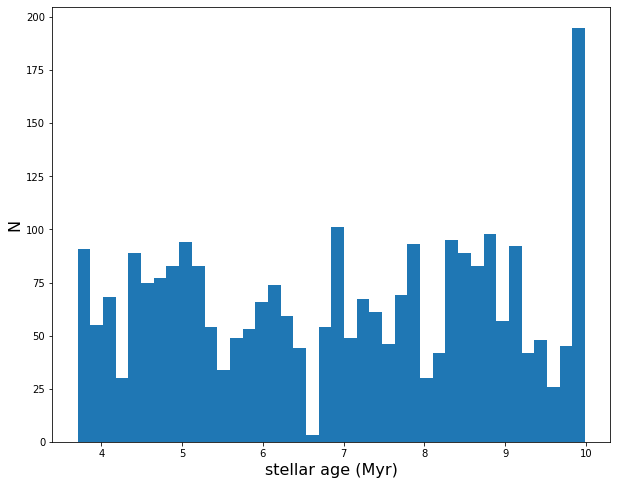

In [14]:
from matplotlib import pyplot
pyplot.figure(figsize=(10,8) )
n,edges,c = pyplot.hist(cluster_table['age'],bins=40)
pyplot.xlabel('stellar age (Myr)',fontsize=16)
pyplot.ylabel('N',fontsize=16)

Here some initial implementation of different ages.

The code below uses the edge bins from the above histogram assuming stars in each bin have the same age. There are 40 time blocks in this case.

In [ ]:
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
# Define isochrone parameters
#logAge = numpy.log10(5*10**6.) # Age in log(years)
AKs = 0.8 # extinction in mags
dist = 4000 # distance in parsec
metallicity = 0 # Metallicity in [M/H]

# Define evolution/atmosphere models and extinction law
evo_model = evolution.Parsec() 
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Also specify filters for synthetic photometry (optional). Here we use 
# the HST WFC3-IR F127M, F139M, and F153M filters
filt_list = ['wfc3,ir,f127m', 'wfc3,ir,f139m', 'wfc3,ir,f153m']

# Specify the directory we want the output isochrone
# table saved in. If the directory does not already exist,
# SPISEA will create it.
iso_dir = 'isochrones/'

# Make IsochronePhot object. Note that this will take a minute or two, 
# unless the isochrone has been generated previously.
#
# Note that this is not show all of the user options 
# for IsochronePhot. See docs for complete list of options.
my_isos = []
for al,at in zip(edges[:-1],edges[1:]):
    logAge = numpy.log10(numpy.mean([al,at])*1e6)
    try: 
        my_iso = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=0,
                                    evo_model=evo_model, atm_func=atm_func,
                                    red_law=red_law, filters=filt_list,recomp=True,
                                        iso_dir=iso_dir)
    except FileNotFoundError:
        print("Warning: age not available %s"%( 10.0**logAge ) )
        my_iso = None
    my_isos.append(my_iso)

Changing to logg=4.00 for T= 34674 logg=3.98
Changing to logg=4.00 for T= 35011 logg=3.95
Changing to logg=4.00 for T= 35067 logg=3.94
Changing to logg=4.00 for T= 35116 logg=3.94
Changing to logg=4.00 for T= 35343 logg=3.91
Changing to logg=4.00 for T= 35530 logg=3.86
Changing to logg=4.00 for T= 35547 logg=3.84
Changing to logg=4.00 for T= 35539 logg=3.83
Changing to logg=4.00 for T= 35424 logg=3.78
Changing to logg=4.00 for T= 35261 logg=3.75
Changing to logg=4.00 for T= 34866 logg=3.69
Changing to logg=4.00 for T= 34300 logg=3.62
Changing to logg=4.00 for T= 34056 logg=3.60
Changing to logg=4.00 for T= 33320 logg=3.53
Changing to logg=4.00 for T= 32501 logg=3.46
Changing to logg=4.00 for T= 31572 logg=3.39
Changing to logg=3.50 for T= 30988 logg=3.34
Changing to logg=3.50 for T= 30220 logg=3.28
Changing to logg=3.50 for T= 29309 logg=3.21
Changing to logg=3.50 for T= 28275 logg=3.13
Changing to logg=3.50 for T= 27258 logg=3.05
Changing to logg=3.50 for T= 26272 logg=2.98
Changing t

Changing to T= 50000 for T=121116 logg=5.25
Changing to logg=5.00 for T=121116 logg=5.25
Changing to T= 50000 for T=123766 logg=5.29
Changing to logg=5.00 for T=123766 logg=5.29
Changing to T= 50000 for T=126648 logg=5.33
Changing to logg=5.00 for T=126648 logg=5.33
Changing to T= 50000 for T=129509 logg=5.37
Changing to logg=5.00 for T=129509 logg=5.37
Changing to T= 50000 for T=131917 logg=5.40
Changing to logg=5.00 for T=131917 logg=5.40
Changing to T= 50000 for T=132343 logg=5.41
Changing to logg=5.00 for T=132343 logg=5.41
Changing to T= 50000 for T=133752 logg=5.42
Changing to logg=5.00 for T=133752 logg=5.42
Changing to T= 50000 for T=133875 logg=5.42
Changing to logg=5.00 for T=133875 logg=5.42
Changing to T= 50000 for T=135425 logg=5.42
Changing to logg=5.00 for T=135425 logg=5.42
Changing to T= 50000 for T=135925 logg=5.42
Changing to logg=5.00 for T=135925 logg=5.42
Changing to T= 50000 for T=135988 logg=5.42
Changing to logg=5.00 for T=135988 logg=5.42
Changing to T= 50000 

Changing to logg=2.00 for T=  9933 logg=0.95
Changing to logg=2.00 for T=  9579 logg=0.89
Changing to logg=1.50 for T=  8821 logg=0.74
Changing to logg=1.50 for T=  8568 logg=0.69
Changing to logg=1.00 for T=  7764 logg=0.52
Changing to logg=0.50 for T=  6662 logg=0.24
Changing to logg=0.50 for T=  6462 logg=0.18
Changing to logg=0.50 for T=  6239 logg=0.12
Changing to logg=0.50 for T=  6069 logg=0.06
Changing to logg=0.50 for T=  6031 logg=0.05
Changing to logg=0.50 for T=  6015 logg=0.04
Changing to logg=0.50 for T=  6189 logg=0.01
Changing to logg=2.50 for T= 12601 logg=1.23
Changing to logg=2.50 for T= 15671 logg=1.61
Changing to T= 50000 for T= 51180 logg=3.66
Changing to logg=5.00 for T= 51180 logg=3.66
Changing to T= 50000 for T= 57266 logg=3.86
Changing to logg=5.00 for T= 57266 logg=3.86
Changing to T= 50000 for T= 59047 logg=3.91
Changing to logg=5.00 for T= 59047 logg=3.91
Changing to T= 50000 for T= 60506 logg=3.95
Changing to logg=5.00 for T= 60506 logg=3.95
Changing to T=

Changing to logg=3.00 for T= 24854 logg=2.88
Changing to logg=3.00 for T= 23458 logg=2.77
Changing to logg=3.00 for T= 22136 logg=2.66
Changing to logg=3.00 for T= 20859 logg=2.54
Changing to logg=3.00 for T= 20394 logg=2.50
Changing to logg=3.00 for T= 20109 logg=2.47
Changing to logg=3.00 for T= 19342 logg=2.40
Changing to logg=2.50 for T= 18569 logg=2.32
Changing to logg=2.50 for T= 17326 logg=2.19
Changing to logg=2.50 for T= 15664 logg=2.00
Changing to logg=2.50 for T= 13763 logg=1.77
Changing to logg=2.50 for T= 13375 logg=1.70
Changing to logg=2.50 for T= 13696 logg=1.73
Changing to logg=2.50 for T= 14703 logg=1.85
Changing to logg=2.50 for T= 15374 logg=1.92
Changing to logg=2.50 for T= 15585 logg=1.94
Changing to logg=2.50 for T= 15747 logg=1.95
Changing to logg=2.50 for T= 15838 logg=1.96
Changing to logg=2.50 for T= 16151 logg=1.99
Changing to logg=2.50 for T= 16244 logg=2.00
Changing to logg=2.50 for T= 16346 logg=2.01
Changing to logg=2.50 for T= 16395 logg=2.01
Changing t

M =   2.250 Msun  T =  7464 K  m_hst_f139m = 15.49
M =  45.729 Msun  T = 18569 K  m_hst_f139m = 7.60
M =  55.695 Msun  T = 135114 K  m_hst_f139m = 14.78
Starting filter: wfc3,ir,f153m   Elapsed time: 19.72 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2587 K  m_hst_f153m = 21.31
M =   2.250 Msun  T =  7464 K  m_hst_f153m = 15.06
M =  45.729 Msun  T = 18569 K  m_hst_f153m = 7.24
M =  55.695 Msun  T = 135114 K  m_hst_f153m = 14.44
      Time taken: 32.76 seconds
Changing to logg=4.00 for T= 33939 logg=3.98
Changing to logg=4.00 for T= 34277 logg=3.96
Changing to logg=4.00 for T= 34674 logg=3.92
Changing to logg=4.00 for T= 34706 logg=3.91
Changing to logg=4.00 for T= 34874 logg=3.87
Changing to logg=4.00 for T= 34898 logg=3.83
Changing to logg=4.00 for T= 34834 logg=3.79
Changing to logg=4.00 for T= 34610 logg=3.74
Changing to logg=4.00 for T= 34498 logg=3.72
Changing to logg=4.00 for T= 34459 logg=3.71
Changing to logg=4.00 for T= 33963 logg=3.65
Changing to logg=4.00 for

Changing to T= 50000 for T=156783 logg=5.65
Changing to logg=5.00 for T=156783 logg=5.65
Changing to T= 50000 for T=160583 logg=5.68
Changing to logg=5.00 for T=160583 logg=5.68
Changing to T= 50000 for T=164475 logg=5.72
Changing to logg=5.00 for T=164475 logg=5.72
Changing to T= 50000 for T=168345 logg=5.75
Changing to logg=5.00 for T=168345 logg=5.75
Changing to T= 50000 for T=173660 logg=5.80
Changing to logg=5.00 for T=173660 logg=5.80
Changing to T= 50000 for T=177951 logg=5.83
Changing to logg=5.00 for T=177951 logg=5.83
Changing to T= 50000 for T=183823 logg=5.88
Changing to logg=5.00 for T=183823 logg=5.88
Changing to T= 50000 for T=189540 logg=5.92
Changing to logg=5.00 for T=189540 logg=5.92
Changing to T= 50000 for T=195434 logg=5.96
Changing to logg=5.00 for T=195434 logg=5.96
Changing to T= 50000 for T=201372 logg=6.00
Changing to logg=5.00 for T=201372 logg=6.00
Changing to T= 50000 for T=207300 logg=6.04
Changing to logg=5.00 for T=207300 logg=6.04
Changing to T= 50000 

Changing to T= 50000 for T=127644 logg=5.37
Changing to logg=5.00 for T=127644 logg=5.37
Changing to T= 50000 for T=129509 logg=5.40
Changing to logg=5.00 for T=129509 logg=5.40
Changing to T= 50000 for T=130768 logg=5.42
Changing to logg=5.00 for T=130768 logg=5.42
Changing to T= 50000 for T=130948 logg=5.42
Changing to logg=5.00 for T=130948 logg=5.42
Changing to T= 50000 for T=132221 logg=5.43
Changing to logg=5.00 for T=132221 logg=5.43
Changing to T= 50000 for T=133475 logg=5.43
Changing to logg=5.00 for T=133475 logg=5.43
Changing to T= 50000 for T=133537 logg=5.43
Changing to logg=5.00 for T=133537 logg=5.43
Changing to T= 50000 for T=135831 logg=5.45
Changing to logg=5.00 for T=135831 logg=5.45
Changing to T= 50000 for T=136113 logg=5.46
Changing to logg=5.00 for T=136113 logg=5.46
Changing to T= 50000 for T=137214 logg=5.47
Changing to logg=5.00 for T=137214 logg=5.47
Changing to T= 50000 for T=142004 logg=5.51
Changing to logg=5.00 for T=142004 logg=5.51
Changing to T= 50000 

Changing to T= 50000 for T=186080 logg=5.91
Changing to logg=5.00 for T=186080 logg=5.91
Changing to T= 50000 for T=191823 logg=5.96
Changing to logg=5.00 for T=191823 logg=5.96
Changing to T= 50000 for T=196246 logg=5.99
Changing to logg=5.00 for T=196246 logg=5.99
Changing to T= 50000 for T=202628 logg=6.03
Changing to logg=5.00 for T=202628 logg=6.03
Changing to T= 50000 for T=209508 logg=6.07
Changing to logg=5.00 for T=209508 logg=6.07
Changing to T= 50000 for T=214487 logg=6.11
Changing to logg=5.00 for T=214487 logg=6.11
Isochrone generation took 27.236711 s.
Making photometry for isochrone: log(t) = 6.66  AKs = 0.80  dist = 4000
     Starting at:  2023-10-04 21:03:45.864208   Usually takes ~5 minutes
Starting filter: wfc3,ir,f127m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2565 K  m_hst_f127m = 22.26
M =   2.168 Msun  T =  7391 K  m_hst_f127m = 16.04
M =  40.856 Msun  T = 17640 K  m_hst_f127m = 8.02
Starting filter: wfc3,ir,f139m   Elapsed

Changing to T= 50000 for T=149073 logg=5.60
Changing to logg=5.00 for T=149073 logg=5.60
Changing to T= 50000 for T=153073 logg=5.64
Changing to logg=5.00 for T=153073 logg=5.64
Changing to T= 50000 for T=156783 logg=5.68
Changing to logg=5.00 for T=156783 logg=5.68
Changing to T= 50000 for T=160842 logg=5.71
Changing to logg=5.00 for T=160842 logg=5.71
Changing to T= 50000 for T=166073 logg=5.76
Changing to logg=5.00 for T=166073 logg=5.76
Changing to T= 50000 for T=170412 logg=5.80
Changing to logg=5.00 for T=170412 logg=5.80
Changing to T= 50000 for T=175873 logg=5.84
Changing to logg=5.00 for T=175873 logg=5.84
Changing to T= 50000 for T=180260 logg=5.88
Changing to logg=5.00 for T=180260 logg=5.88
Changing to T= 50000 for T=186252 logg=5.92
Changing to logg=5.00 for T=186252 logg=5.92
Changing to T= 50000 for T=192088 logg=5.97
Changing to logg=5.00 for T=192088 logg=5.97
Changing to T= 50000 for T=196607 logg=6.00
Changing to logg=5.00 for T=196607 logg=6.00
Changing to T= 50000 

Changing to T= 50000 for T=139701 logg=5.50
Changing to logg=5.00 for T=139701 logg=5.50
Changing to T= 50000 for T=143516 logg=5.54
Changing to logg=5.00 for T=143516 logg=5.54
Changing to T= 50000 for T=145915 logg=5.57
Changing to logg=5.00 for T=145915 logg=5.57
Changing to T= 50000 for T=150834 logg=5.62
Changing to logg=5.00 for T=150834 logg=5.62
Changing to T= 50000 for T=154775 logg=5.66
Changing to logg=5.00 for T=154775 logg=5.66
Changing to T= 50000 for T=158416 logg=5.69
Changing to logg=5.00 for T=158416 logg=5.69
Changing to T= 50000 for T=162144 logg=5.73
Changing to logg=5.00 for T=162144 logg=5.73
Changing to T= 50000 for T=166073 logg=5.76
Changing to logg=5.00 for T=166073 logg=5.76
Changing to T= 50000 for T=169942 logg=5.80
Changing to logg=5.00 for T=169942 logg=5.80
Changing to T= 50000 for T=173860 logg=5.83
Changing to logg=5.00 for T=173860 logg=5.83
Changing to T= 50000 for T=177828 logg=5.86
Changing to logg=5.00 for T=177828 logg=5.86
Changing to T= 50000 

Isochrone generation took 26.926596 s.
Making photometry for isochrone: log(t) = 6.70  AKs = 0.80  dist = 4000
     Starting at:  2023-10-04 21:06:31.994049   Usually takes ~5 minutes
Starting filter: wfc3,ir,f127m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2543 K  m_hst_f127m = 22.40
M =   2.134 Msun  T =  8488 K  m_hst_f127m = 16.24
M =  36.268 Msun  T = 17092 K  m_hst_f127m = 8.05
Starting filter: wfc3,ir,f139m   Elapsed time: 7.65 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2543 K  m_hst_f139m = 22.34
M =   2.134 Msun  T =  8488 K  m_hst_f139m = 15.82
M =  36.268 Msun  T = 17092 K  m_hst_f139m = 7.68
Starting filter: wfc3,ir,f153m   Elapsed time: 17.79 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2543 K  m_hst_f153m = 21.60
M =   2.134 Msun  T =  8488 K  m_hst_f153m = 15.42
M =  36.268 Msun  T = 17092 K  m_hst_f153m = 7.31
      Time taken: 27.23 seconds
Changing to logg=4.00 for T= 31960 logg=3.99
Changing to 

Changing to logg=0.50 for T=  6067 logg=0.46
Changing to logg=0.50 for T=  6126 logg=0.22
Changing to logg=0.50 for T=  6831 logg=0.38
Changing to logg=1.00 for T=  7651 logg=0.56
Changing to logg=3.00 for T= 24906 logg=2.60
Changing to logg=3.50 for T= 26412 logg=2.70
Changing to logg=3.50 for T= 28106 logg=2.81
Changing to logg=3.50 for T= 30669 logg=2.96
Changing to logg=4.00 for T= 35859 logg=3.22
Changing to logg=4.50 for T= 41333 logg=3.45
Changing to logg=5.00 for T= 49408 logg=3.75
Changing to T= 50000 for T= 61447 logg=4.10
Changing to logg=5.00 for T= 61447 logg=4.10
Changing to T= 50000 for T= 70729 logg=4.31
Changing to logg=5.00 for T= 70729 logg=4.31
Changing to T= 50000 for T= 75318 logg=4.40
Changing to logg=5.00 for T= 75318 logg=4.40
Changing to T= 50000 for T= 82680 logg=4.52
Changing to logg=5.00 for T= 82680 logg=4.52
Changing to T= 50000 for T= 90303 logg=4.65
Changing to logg=5.00 for T= 90303 logg=4.65
Isochrone generation took 23.846884 s.
Making photometry for

Changing to logg=2.00 for T=  9579 logg=1.27
Changing to logg=2.00 for T=  9095 logg=1.18
Changing to logg=1.50 for T=  8509 logg=1.06
Changing to logg=1.00 for T=  7775 logg=0.91
Changing to logg=2.00 for T=  9147 logg=0.95
Changing to logg=2.00 for T= 10879 logg=1.23
Changing to logg=2.50 for T= 12939 logg=1.50
Changing to logg=2.50 for T= 13759 logg=1.58
Changing to logg=2.50 for T= 14501 logg=1.64
Changing to logg=2.50 for T= 14723 logg=1.64
Changing to logg=2.50 for T= 15157 logg=1.66
Changing to logg=2.50 for T= 15966 logg=1.71
Isochrone generation took 22.302927 s.
Making photometry for isochrone: log(t) = 6.75  AKs = 0.80  dist = 4000
     Starting at:  2023-10-04 21:09:39.516757   Usually takes ~5 minutes
Starting filter: wfc3,ir,f127m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2526 K  m_hst_f127m = 22.53
M =   2.100 Msun  T =  8995 K  m_hst_f127m = 16.63
M =  31.305 Msun  T = 20735 K  m_hst_f127m = 8.90
Starting filter: wfc3,ir,f139m   E

M =   2.017 Msun  T =  8576 K  m_hst_f127m = 16.48
M =  29.588 Msun  T = 21807 K  m_hst_f127m = 9.15
Starting filter: wfc3,ir,f139m   Elapsed time: 6.28 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2521 K  m_hst_f139m = 22.53
M =   2.017 Msun  T =  8576 K  m_hst_f139m = 16.07
M =  29.588 Msun  T = 21807 K  m_hst_f139m = 8.78
Starting filter: wfc3,ir,f153m   Elapsed time: 13.11 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2521 K  m_hst_f153m = 21.78
M =   2.017 Msun  T =  8576 K  m_hst_f153m = 15.67
M =  29.588 Msun  T = 21807 K  m_hst_f153m = 8.42
      Time taken: 20.22 seconds
Changing to logg=4.00 for T= 31017 logg=3.95
Changing to logg=4.00 for T= 31318 logg=3.92
Changing to logg=4.00 for T= 31470 logg=3.89
Changing to logg=4.00 for T= 31572 logg=3.85
Changing to logg=4.00 for T= 31586 logg=3.82
Changing to logg=4.00 for T= 31557 logg=3.79
Changing to logg=4.00 for T= 31420 logg=3.74
Changing to logg=4.00 for T= 31060 logg=3.68
Changing to logg=3.50 

Changing to logg=3.00 for T= 21597 logg=2.75
Changing to logg=3.00 for T= 21018 logg=2.70
Changing to logg=3.00 for T= 20253 logg=2.63
Changing to logg=3.00 for T= 19765 logg=2.59
Changing to logg=3.00 for T= 19129 logg=2.53
Changing to logg=2.50 for T= 18599 logg=2.48
Changing to logg=2.50 for T= 18088 logg=2.43
Changing to logg=2.50 for T= 17547 logg=2.38
Changing to logg=2.50 for T= 16990 logg=2.32
Changing to logg=2.50 for T= 16413 logg=2.26
Changing to logg=2.50 for T= 16018 logg=2.22
Changing to logg=2.50 for T= 15802 logg=2.20
Changing to logg=2.50 for T= 15371 logg=2.15
Changing to logg=2.50 for T= 14911 logg=2.10
Changing to logg=2.50 for T= 14415 logg=2.04
Changing to logg=2.50 for T= 13861 logg=1.97
Changing to logg=2.50 for T= 13204 logg=1.89
Changing to logg=2.50 for T= 12812 logg=1.83
Changing to logg=2.50 for T= 12337 logg=1.77
Changing to logg=2.00 for T= 11730 logg=1.68
Changing to logg=2.00 for T= 10859 logg=1.55
Changing to logg=2.00 for T=  9592 logg=1.33
Isochrone 

M =   2.148 Msun  T =  9915 K  m_hst_f127m = 16.88
M =  24.845 Msun  T = 13715 K  m_hst_f127m = 8.14
Starting filter: wfc3,ir,f139m   Elapsed time: 5.60 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2506 K  m_hst_f139m = 22.71
M =   2.148 Msun  T =  9915 K  m_hst_f139m = 16.48
M =  24.845 Msun  T = 13715 K  m_hst_f139m = 7.76
Starting filter: wfc3,ir,f153m   Elapsed time: 11.88 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2506 K  m_hst_f153m = 21.94
M =   2.148 Msun  T =  9915 K  m_hst_f153m = 16.09
M =  24.845 Msun  T = 13715 K  m_hst_f153m = 7.39
      Time taken: 19.27 seconds
Changing to logg=3.50 for T= 27650 logg=3.43
Changing to logg=3.50 for T= 27052 logg=3.37
Changing to logg=3.50 for T= 26400 logg=3.31
Changing to logg=3.00 for T= 23752 logg=2.98
Changing to logg=3.00 for T= 23067 logg=2.93
Changing to logg=3.00 for T= 22346 logg=2.87
Changing to logg=3.00 for T= 21732 logg=2.82
Changing to logg=3.00 for T= 20922 logg=2.76
Changing to logg=3.00 

Changing to logg=2.50 for T= 14080 logg=2.10
Changing to logg=2.50 for T= 13709 logg=2.05
Changing to logg=2.50 for T= 13277 logg=2.00
Changing to logg=2.50 for T= 12785 logg=1.93
Changing to logg=2.50 for T= 12215 logg=1.85
Changing to logg=2.00 for T= 11561 logg=1.76
Changing to logg=2.00 for T= 10799 logg=1.64
Changing to logg=2.00 for T=  9954 logg=1.50
Changing to logg=2.00 for T=  9012 logg=1.33
Isochrone generation took 17.769300 s.
Making photometry for isochrone: log(t) = 6.88  AKs = 0.80  dist = 4000
     Starting at:  2023-10-04 21:17:33.532033   Usually takes ~5 minutes
Starting filter: wfc3,ir,f127m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2503 K  m_hst_f127m = 22.79
M =   2.075 Msun  T =  9469 K  m_hst_f127m = 16.94
M =  23.187 Msun  T = 14080 K  m_hst_f127m = 8.39
Starting filter: wfc3,ir,f139m   Elapsed time: 7.20 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2503 K  m_hst_f139m = 22.77
M =   2.075 Msun  T =  9469 

      Time taken: 23.18 seconds
Changing to logg=3.50 for T= 27233 logg=3.49
Changing to logg=3.50 for T= 26583 logg=3.42
Changing to logg=3.50 for T= 26321 logg=3.24
Changing to logg=3.50 for T= 26455 logg=3.25
Changing to logg=3.00 for T= 22683 logg=2.98
Changing to logg=3.00 for T= 21979 logg=2.93
Changing to logg=3.00 for T= 21389 logg=2.88
Changing to logg=3.00 for T= 20768 logg=2.83
Changing to logg=3.00 for T= 19985 logg=2.76
Changing to logg=3.00 for T= 19494 logg=2.71
Changing to logg=2.50 for T= 16827 logg=2.46
Changing to logg=2.50 for T= 16429 logg=2.42
Changing to logg=2.50 for T= 16025 logg=2.38
Changing to logg=2.50 for T= 15816 logg=2.35
Changing to logg=2.50 for T= 15596 logg=2.33
Changing to logg=2.50 for T= 15143 logg=2.28
Changing to logg=2.50 for T= 14655 logg=2.22
Changing to logg=2.50 for T= 14109 logg=2.16
Changing to logg=2.50 for T= 13468 logg=2.08
Changing to logg=2.50 for T= 13086 logg=2.03
Changing to logg=2.50 for T= 12644 logg=1.97
Changing to logg=2.50 f

M =   2.201 Msun  T = 10191 K  m_hst_f153m = 16.25
M =  20.353 Msun  T =  8900 K  m_hst_f153m = 6.66
      Time taken: 19.79 seconds
Changing to logg=3.50 for T= 26248 logg=3.44
Changing to logg=3.50 for T= 26406 logg=3.29
Changing to logg=3.50 for T= 26436 logg=3.29
Changing to logg=3.50 for T= 26122 logg=3.27
Changing to logg=3.00 for T= 22228 logg=2.99
Changing to logg=3.00 for T= 21672 logg=2.94
Changing to logg=3.00 for T= 21091 logg=2.89
Changing to logg=3.00 for T= 20635 logg=2.86
Changing to logg=3.00 for T= 20170 logg=2.82
Changing to logg=3.00 for T= 19702 logg=2.77
Changing to logg=3.00 for T= 19218 logg=2.73
Changing to logg=2.50 for T= 16776 logg=2.50
Changing to logg=2.50 for T= 16398 logg=2.46
Changing to logg=2.50 for T= 16003 logg=2.42
Changing to logg=2.50 for T= 15592 logg=2.37
Changing to logg=2.50 for T= 15371 logg=2.35
Changing to logg=2.50 for T= 15146 logg=2.32
Changing to logg=2.50 for T= 14669 logg=2.27
Changing to logg=2.50 for T= 14151 logg=2.21
Changing to 

M =  19.151 Msun  T = 14598 K  m_hst_f127m = 9.01
Starting filter: wfc3,ir,f139m   Elapsed time: 7.51 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2500 K  m_hst_f139m = 22.94
M =   1.950 Msun  T =  9224 K  m_hst_f139m = 16.71
M =  19.151 Msun  T = 14598 K  m_hst_f139m = 8.63
Starting filter: wfc3,ir,f153m   Elapsed time: 14.07 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2500 K  m_hst_f153m = 22.17
M =   1.950 Msun  T =  9224 K  m_hst_f153m = 16.32
M =  19.151 Msun  T = 14598 K  m_hst_f153m = 8.26
      Time taken: 21.54 seconds
Changing to logg=3.50 for T= 26321 logg=3.32
Changing to logg=3.50 for T= 26345 logg=3.32
Changing to logg=3.00 for T= 21692 logg=2.99
Changing to logg=3.00 for T= 21111 logg=2.94
Changing to logg=3.00 for T= 20507 logg=2.89
Changing to logg=3.00 for T= 20035 logg=2.85
Changing to logg=3.00 for T= 19557 logg=2.80
Changing to logg=3.00 for T= 19063 logg=2.76
Changing to logg=2.50 for T= 16417 logg=2.50
Changing to logg=2.50 for T=

In [ ]:
from matplotlib import pyplot as py

py.figure(2, figsize=(10,10))
py.clf()
for la,ta,iso in zip(edges[:-1],edges[1:],my_isos):
    mask = (cluster_table['age'] > la) * (cluster_table['age'] < ta)
    clusterObject = CustomResolvedCluster(cluster_table[mask],iso)
    iso = my_iso.points

    star_systems = clusterObject.star_systems
    py.plot(star_systems['m_hst_f127m'] - star_systems['m_hst_f153m'], star_systems['m_hst_f153m'],
           'k.', ms=5, alpha=0.5, label='__nolegend__')
py.xlabel('F127M - F153M')
py.ylabel('F153M')
py.gca().invert_yaxis()
py.legend()